# 카드 거래이력 분석을 통한 고객 특성 파악

> 목차

- 프로젝트 Summary
- 문제상황
- PROCESS01
- PROCESS02
- PROCESS03

## 프로젝트 Summary
-----
> 프로젝트명

▶ 카드거래이력 분석을 통한 고객 특성 파악

> 프로젝트 유형

▶ 데이터 EDA 및 인사이트 추출

> 학습목표

▶ 데이터를 전처리할 수 있는 역량 습득
▶ 가설 수립, 데이터 핸들링을 통해 인사이트르르 추출할 수 있는 역량 습득

## 문제상황 설명
------
> 시나리오

```
A사는 신규 브랜드의 점포를 입점시키려는 계획을 갖고있으며,
신규 브랜드이기 때문에 과거 상권에 대한 정보가 없어, 어느 지역에 입점을 시켜야 할지 고민이 많다.
고민 끝에 지역B를 최종 후보로 정했지만 자신들의 브랜드와 해당 지역에 거주하는 고객의 소비성향과 비슷한지가 아직 의문!
따라서 신용카드사에서 데이터를 받아서 고객의 소비성향을 분석해보려고 한다.
```

> 문제정의

▶ 신규 브랜드 입점 상권 불분명

> 기대효과

▶ 신규 상권 입점 여부 결정 및 상권의 고객 이해

> 해결방안

▶ 카드사 데이터를 활용해 지역 거주 고객 소비성향을 파악 후 브랜드과 매칭을 통해 입점 결정

> 성과측정

▶ 신규 집입 결정 여부

> 현업적용

▶ 인사이트 Report 작성 및 보고





> 데이터 살펴보기
- 상점 ID별 카드 Spending Data
- 데이터 명세

|Store_id|date|time|card_id|amount|installments|dats_of_week|holyday|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|상점ID|날짜|시간|카드ID|매출액(음수는 거래 취소)|할부개월, 일시불은 빈문자열|요일(월요일0,일요일6)|공휴일여부|

In [ ]:
# warning 제거
import warnings
warnings.filterwarnings('ignore')

# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/카드 거래 이력 분석을 통한 고객특성 파악')
os.getcwd()

'/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/카드 거래 이력 분석을 통한 고객특성 파악'

In [ ]:
# data read
import pandas as pd
df = pd.read_csv('CARD_DATA.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


## **🔈Process01**  
**┗ 업종별 사용 형태 분석**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)

In [ ]:
# data shape
print('df', df.shape)

df (3362796, 8)


In [ ]:
# data type
df.info()
# date가 Object로 기록되어있음
# time도 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [ ]:
# Null값 확인
print(df.isnull().sum())
#installments는 할부 안할 수도 있으니 null값이 있을 수 있지만 , 나중에 0으로 바꿔줘야지

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [ ]:
# outlier
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [ ]:
#할부개월 일시불-> 0으로 처리
df['installments'].fillna(0,inplace=True)

In [ ]:
print(df.isnull().sum())

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


### · 업종별 이용 및 매출 비중 분석
---  

In [ ]:
# 상점 수
df['store_id'].value_counts()

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: store_id, Length: 1775, dtype: int64

In [ ]:
# 업종별 이용 횟수 비중
df_store = pd.DataFrame(df['store_id'].value_counts()).reset_index()
df_store.columns = ['store_id','cnt']
df_store

,store_id,cnt
0,0,68773
1,753,39318
2,105,36063
3,1342,33335
4,428,33285
...,...,...
1770,1605,1
1771,991,1
1772,1263,1
1773,1530,1


In [ ]:
# 업종별 이용 횟수 비중 top10
df_store['total'] = df_store['cnt'].sum()
df_store['ratio'] = round((df_store['cnt']/df_store['total'])*100, 2)
df_store.sort_values(by = 'ratio', ascending= False)

,store_id,cnt,total,ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99
...,...,...,...,...
1387,507,72,3362796,0.00
1386,571,73,3362796,0.00
1385,475,73,3362796,0.00
1384,673,73,3362796,0.00


In [ ]:
# 업종별 매출액 비중
df_amt = pd.DataFrame(df['amount'].groupby(df['store_id']).sum()).reset_index()
df_amt.sort_values(by ='amount', ascending = False)

,store_id,amount
746,753,9474601
1326,1342,7301327
158,161,5236075
0,0,5234611
948,958,4965728
...,...,...
817,826,5
601,608,5
346,350,0
857,866,0


In [ ]:
# ▶ 업종별 매출액 비중 Top 10
df_amt['total'] = df_amt['amount'].sum()
df_amt['ratio'] = round( (df_amt['amount'] / df_amt['total']) * 100,2)
df_amt.head(10)

,store_id,amount,total,ratio
0,0,5234611,490841453,1.07
1,1,147950,490841453,0.03
2,2,1615060,490841453,0.33
3,3,62781,490841453,0.01
4,4,270312,490841453,0.06
5,5,184437,490841453,0.04
6,6,1389983,490841453,0.28
7,7,109510,490841453,0.02
8,8,515535,490841453,0.11
9,9,19760,490841453,0.00


## **🔉Process02**  
**┗ 핵심 업종 탐색**  
---

### · 업종별 이용 고객수 분석
---

In [ ]:
# ▶ 상위에서 정의한 이용 비중 Data
df_store.columns = ['store_id', 'cnt', 'cnt_total', 'cnt_ratio']
df_store.head(5)

,store_id,cnt,cnt_total,cnt_ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99


In [ ]:
# ▶ 상위에서 정의한 이용 비중 Data
df_amt.columns = ['store_id', 'amt', 'amt_total', 'amt_ratio']
df_amt.head(5)

,store_id,amt,amt_total,amt_ratio
0,0,5234611,490841453,1.07
1,1,147950,490841453,0.03
2,2,1615060,490841453,0.33
3,3,62781,490841453,0.01
4,4,270312,490841453,0.06


In [ ]:
# data merge
df_merge = pd.merge(df_store, df_amt, how='left', on='store_id')
df_merge.head()

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07
1,753,39318,3362796,1.17,9474601,490841453,1.93
2,105,36063,3362796,1.07,2991082,490841453,0.61
3,1342,33335,3362796,0.99,7301327,490841453,1.49
4,428,33285,3362796,0.99,1312204,490841453,0.27


In [ ]:
# 이용 고객수 (unique)
df_customer = pd.DataFrame(df['card_id'].groupby(df['store_id']).nunique()).reset_index()
df_customer.columns = ['store_id','customer']
df_customer['customer_total'] = df['card_id'].nunique()
df_customer['customer_ratio'] = round((df_customer['customer']/df_customer['customer_total'])*100,2)
df_customer.sort_values(by=['customer_ratio'], ascending = False).head(10)

,store_id,customer,customer_total,customer_ratio
423,428,18456,922522,2.00
218,221,17161,922522,1.86
289,293,14915,922522,1.62
1326,1342,14789,922522,1.60
932,942,13760,922522,1.49
1196,1209,13512,922522,1.46
0,0,12727,922522,1.38
1027,1038,12523,922522,1.36
746,753,11960,922522,1.30
123,126,11070,922522,1.20


In [ ]:
# 이용 고객수 left join
df_merge = pd.merge(df_merge, df_customer, how = 'left', on = 'store_id' )
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00


### · 1회 사용 금액 / 객단가 분석
---

In [ ]:
# 1회 사용 금액
df_merge['amt_per_use'] = round((df_merge['amt']/df_merge['cnt'])*100,2)

# 객단가
df_merge['cus_per_use'] = round((df_merge['amt']/df_merge['customer'])*100,2)

df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,7611.43,41129.97
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,24097.36,79219.07
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,8294.05,36445.50
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,21902.89,49369.98
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,3942.33,7109.90


### · 핵심업종 정의
---

In [ ]:
# ▶ 이용 비중, 이용 금액 비중, 이용 고객수 비중에 가중치를 적용하여 새로운 Score를 정의
# ▶ cnt_ratio(a)
# ▶ amt_ratio(b)
# ▶ customer_ratio(c)

In [ ]:
a = 2
b = 4
c = 4

df_merge['core_store'] = df_merge['cnt_ratio']*a + df_merge['amt_ratio']*b + df_merge['customer_ratio']*c
df_merge.sort_values(by = 'core_store', ascending = False)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,coer_store,core_store
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,24097.36,79219.07,14.815,15.26
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,21902.89,49369.98,13.785,14.34
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,7611.43,41129.97,14.725,13.90
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,8001.67,14645.10,11.085,11.34
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,3942.33,7109.90,10.915,11.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,313,21,3362796,0.00,14640,490841453,0.00,18,922522,0.00,69714.29,81333.33,0.000,0.00
1599,1549,21,3362796,0.00,9535,490841453,0.00,13,922522,0.00,45404.76,73346.15,0.000,0.00
1600,1239,21,3362796,0.00,2632,490841453,0.00,18,922522,0.00,12533.33,14622.22,0.000,0.00
1602,1220,20,3362796,0.00,14905,490841453,0.00,18,922522,0.00,74525.00,82805.56,0.000,0.00


In [ ]:
# min-max표준화를 통해 100점 만점의 점수로 변환
# Scaled Value = (Original Value − Min Value) / (Max Value − Min Value)

df_merge['core_store_scaled'] = df_merge['core_store'].apply(lambda x:(x - df_merge['core_store'].min()) / df_merge['core_store'].max() - df_merge['core_store'].min())
df_merge['core_store_scaled'] = round(df_merge['core_store_scaled'] * 100,0)
df_merge.sort_values(by = 'core_store_scaled', ascending = False)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,coer_store,core_store,core_store_scaled
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,24097.36,79219.07,14.815,15.26,100.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,21902.89,49369.98,13.785,14.34,94.0
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,7611.43,41129.97,14.725,13.90,91.0
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,8001.67,14645.10,11.085,11.34,74.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,3942.33,7109.90,10.915,11.06,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,312,41,3362796,0.00,67925,490841453,0.01,23,922522,0.00,165670.73,295326.09,0.035,0.04,0.0
1483,1391,42,3362796,0.00,53057,490841453,0.01,38,922522,0.00,126326.19,139623.68,0.035,0.04,0.0
1481,90,42,3362796,0.00,5690,490841453,0.00,22,922522,0.00,13547.62,25863.64,0.000,0.00,0.0
1480,1639,43,3362796,0.00,27955,490841453,0.01,31,922522,0.00,65011.63,90177.42,0.035,0.04,0.0


store 753, 1342, 0, 221, 428 / 총 5개의 store를 핵심업종으로 정의


## **🔊Process03**  
**┗ 핵심업종 추가 분석**  
---

### · 핵심업종 데이터 추출
---

In [ ]:
# store 753, 1342, 0, 221, 428 / 총 5개의 store를 핵심업종으로 정의
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [ ]:
df_core_store = df[df['store_id'].isin([753, 1342, 0, 221, 428])]
df_core_store.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


### · 핵심업종 년도별 매출 비중 변화 분석
---

In [ ]:
# time data 처리
import datetime
df_core_store['Date_merge'] = df['date'].astype(str) + ' ' + df['time'].astype(str)
df_core_store['Date_merge'] = pd.to_datetime(df_core_store['Date_merge'])

In [ ]:
df_core_store['Date_merge'].max(), df_core_store['Date_merge'].min()
#(Timestamp('2018-07-31 23:56:14'), Timestamp('2016-08-01 00:14:51'))
# ▶ 2016년 8월 1일 ~ 2018년 7월 31일까지의 Data


(Timestamp('2018-07-31 23:56:14'), Timestamp('2016-08-01 00:14:51'))

In [ ]:
# ▶ 년, 월로 시간데이터 분해
df_core_store['year'] = df_core_store['Date_merge'].dt.year
df_core_store['month'] = df_core_store['Date_merge'].dt.month
df_core_store.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,2016-12-19 13:31:08,2016,12


In [ ]:
# 핵심 업종 별 매출금액 by 년도
df_year = pd.DataFrame(df_core_store.groupby(['store_id','year'])['amount'].sum()).reset_index()
df_year.head()

,store_id,year,amount
0,0,2016,137336
1,0,2017,3235476
2,0,2018,1861799
3,221,2016,528397
4,221,2017,1318231


In [ ]:
df_pivot = pd.pivot_table(df_year,              #피벗할 테이블
                          index = 'year',       #행 위치에 들어갈 열
                          columns = 'store_id', #컬럼 이름
                          values = 'amount')    #데이터로 사용할 값
df_pivot['total'] = df_pivot.iloc[:, :5].sum(axis=1)
df_pivot = df_pivot.fillna(0)
df_pivot.head()

store_id,0,221,428,753,1342,total
year,,,,,,
2016,137336.0,528397.0,305336.0,525324.0,0.0,1496393.0
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0,18461950.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0,5877645.0


In [ ]:
# ▶ total 금액으로 나눠서 매출 비중으로 변환
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot

store_id,0,221,428,753,1342,total
year,,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000,1496393.0
2017,0.175251,0.071403,0.036021,0.440349,0.276977,18461950.0
2018,0.316759,0.113416,0.058163,0.139440,0.372223,5877645.0


In [ ]:
df_pivot = df_pivot.drop(['total'], axis=1)
df_pivot

store_id,0,221,428,753,1342
year,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000
2017,0.175251,0.071403,0.036021,0.440349,0.276977
2018,0.316759,0.113416,0.058163,0.139440,0.372223


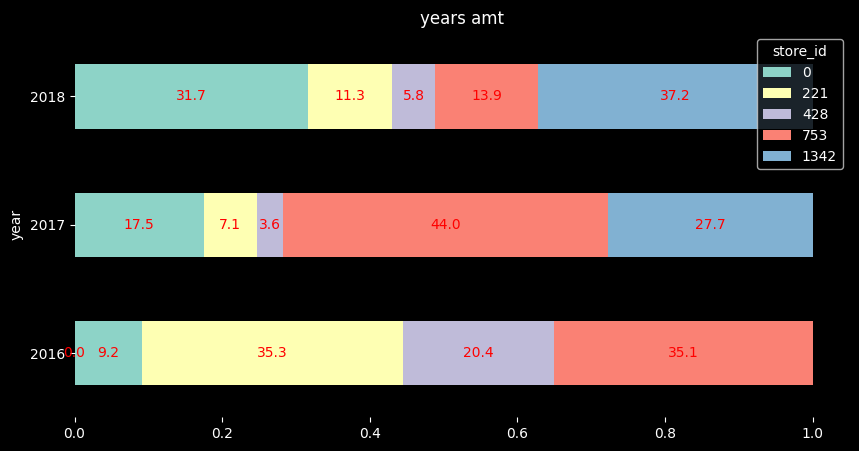

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='r');

plt.box(False)
plt.gcf().set_size_inches(10, 5)
plt.show()

업종 성장세와 하락세
- 0, 1342 store은 안정적 성장세
- 753, 221, 428 store은 하락세
자세한 업종을 알 수 있었다면 좀 더 정확한 분석이 가능했을텐데 아쉽다ㅜ